In [ ]:
import os
import shutil
from multiprocessing import Pool
import argparse


In [ ]:
import numpy as np
import cv2
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from scipy.linalg import svd
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
import PIL

In [ ]:
!git clone https://github.com/tianhai123/yolov3.git

fatal: destination path 'yolov3' already exists and is not an empty directory.


In [ ]:
import cv2

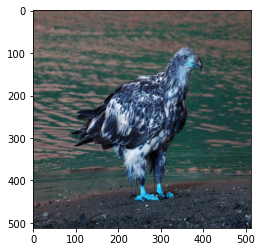

In [ ]:
data = "/content/yolov3/data/eagle.jpg"
imageObject     = Image.open("/content/yolov3/data/eagle.jpg")
image1 = cv2.imread(data)
image = cv2.resize(image1,(512,512))
plt.imshow(image)

In [ ]:
#Step 1 : preprocessing filter
#wiener,regularized, Lucy-Rechard-son, blind convolution and median filters.

In [ ]:
import cv2 
import numpy as np 
from skimage.color import rgb2gray
   
      
# Read the image 
img = rgb2gray(image1)
# Obtain number of rows and columns  
# of the image 
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 


In [ ]:
from skimage.color import rgb2gray
a = rgb2gray(image1)
psnr = peak_signal_noise_ratio(img, img_new)
print(psnr)
a =np.squeeze(np.asarray(img))
ab = rgb2gray(a)
b = np.squeeze(np.asarray(img_new))
abc = rgb2gray(b)
Y_true =  a # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = b # Y_pred = Y' 
  
# Mean Squared Error 
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
print (MSE)
imgx=rgb2gray(img)
imgy2=rgb2gray(img_new)
entr_img = entropy(imgy2, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy2, data_range=imgy2.max() - imgy2.min())
print(ssim_none)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  This is separate from the ipykernel package so we can avoid doing imports until


9.422547727387693
0.11422080779349678
0.0
0.0


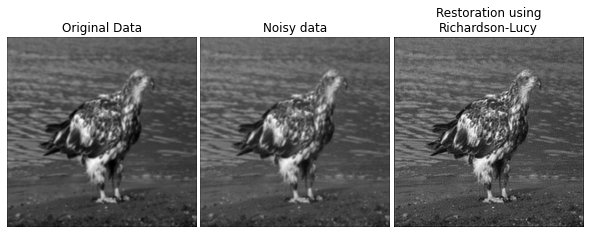

In [ ]:
#lucy_Richardson
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro1 = image
astro = rgb2gray(astro1)
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

In [ ]:
from skimage.color import rgb2gray
psnr = peak_signal_noise_ratio(astro, deconvolved_RL)
print(psnr)
a =np.squeeze(np.asarray(astro))
ab = rgb2gray(a)
b = np.squeeze(np.asarray(deconvolved_RL))
abc = rgb2gray(b)
Y_true =  a # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = b # Y_pred = Y' 
  
# Mean Squared Error 
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
print (MSE)
imgx=rgb2gray(astro)
imgy2=rgb2gray(deconvolved_RL)
entr_img = entropy(imgy2, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy2, data_range=imgy2.max() - imgy2.min())
print(ssim_none)

In [ ]:
#wienner
from skimage import color, data, restoration
img = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
img = convolve2d(astro, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf, 1100)

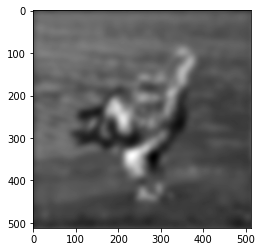

In [ ]:
plt.imshow(deconvolved_img)

In [ ]:
from skimage.color import rgb2gray

psnr = peak_signal_noise_ratio(astro, deconvolved_img)
print(psnr)
a =np.squeeze(np.asarray(astro))
ab = rgb2gray(a)
b = np.squeeze(np.asarray(deconvolved_img))
abc = rgb2gray(b)
Y_true =  a # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = b # Y_pred = Y' 
  
# Mean Squared Error 
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
print (MSE)
imgx=rgb2gray(astro)
imgy2=rgb2gray(deconvolved_img)
entr_img = entropy(imgy2, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy2, data_range=imgy2.max() - imgy2.min())
print(ssim_none)

25.03472523094075
0.00313709360124801


/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


3.6382637551334023
0.6194566127119691


In [ ]:
#unsupervised_wiener algorithm
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

astro = rgb2gray(image1)
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

deconvolved1, _ = restoration.unsupervised_wiener(astro, psf)




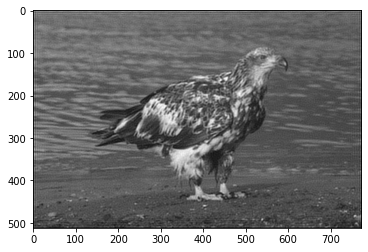

In [ ]:
plt.imshow(deconvolved1)

In [ ]:
c = rgb2gray(image1)
psnr = peak_signal_noise_ratio(c, deconvolved1)
print(psnr)
a =np.squeeze(np.asarray(astro))
ab = rgb2gray(a)
b = np.squeeze(np.asarray(deconvolved1))
abc = rgb2gray(b)
Y_true =  a # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = b # Y_pred = Y' 
  
# Mean Squared Error 
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
print (MSE)
imgx=rgb2gray(astro)
imgy2=rgb2gray(deconvolved1)
entr_img = entropy(imgy2, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy2, data_range=imgy2.max() - imgy2.min())
print(ssim_none)

In [ ]:
from skimage import data 
from skimage.morphology import disk
from skimage.filters import median
from skimage.color import rgb2gray
image3 = cv2.imread('/content/yolov3/data/eagle.jpg')
img = rgb2gray(image3)
med = median(img, disk(5))

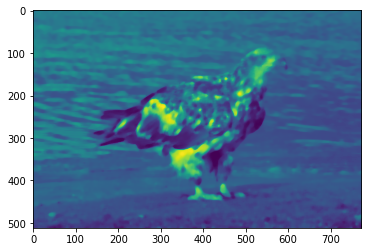

In [ ]:
plt.imshow(med)

In [ ]:
c = rgb2gray(image3)
psnr = peak_signal_noise_ratio(c, med)
print(psnr)
a =np.squeeze(np.asarray(c))
ab = rgb2gray(a)
b = np.squeeze(np.asarray(med))
abc = rgb2gray(b)
Y_true =  a # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = b # Y_pred = Y' 
  
# Mean Squared Error 
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
print (MSE)
imgx=rgb2gray(c)
imgy2=rgb2gray(med)
entr_img = entropy(imgy2, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy2, data_range=imgy2.max() - imgy2.min())
print(ssim_none)

24.915718335901282
0.0032242459754011367


/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


4.256821384700367
0.6315502838497549


In [ ]:
#gausianblurr with smooth
#edge detection
#1 way
blur = cv2.GaussianBlur(med,(5,5),0)
smooth = cv2.addWeighted(blur,1.5,med,-0.5,0)

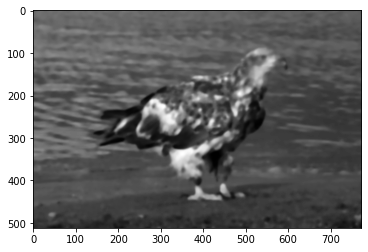

In [ ]:
plt.imshow(smooth)

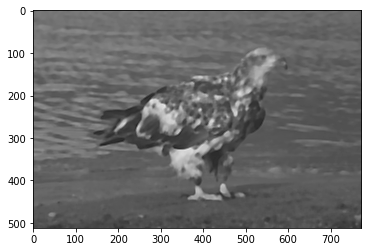

In [ ]:
#sharpening after smoothning
img1 = smooth

# Creating our sharpening filter
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function on our Cybertruck image
sharpenimg=cv2.filter2D(img1,-1,filter)
plt.imshow(sharpenimg)

In [ ]:
filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
# Applying cv2.filter2D function on our Cybertruck image
mexican_hat_img1=cv2.filter2D(img1,-1,filter)


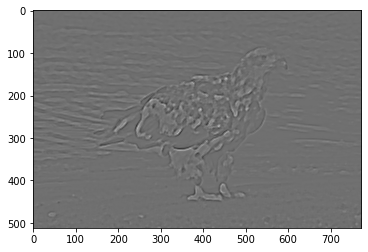

In [ ]:
plt.imshow(mexican_hat_img1)

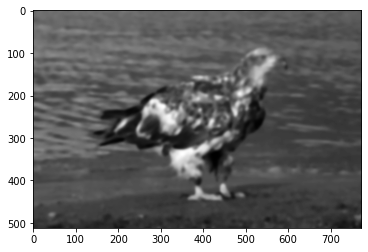

In [ ]:
#gausian Blurred
Gaussian_blurred_1 = np.hstack([
  
  cv2.GaussianBlur(img1,(9,9),0)])  
plt.imshow(Gaussian_blurred_1)


In [ ]:
medi = Gaussian_blurred_1

In [ ]:
import cv2
import numpy as np

# read image
img = med

# normalize float versions
norm_img1 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_img2 = cv2.normalize(img, None, alpha=0, beta=1.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# scale to uint8
norm_img1 = (255*norm_img1).astype(np.uint8)
norm_img2 = np.clip(norm_img2, 0, 1)
norm_img2 = (255*norm_img2).astype(np.uint8)


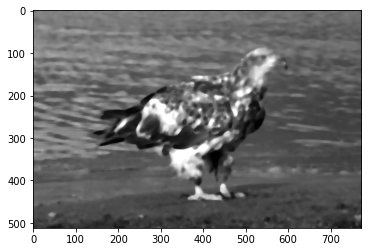

In [ ]:
plt.imshow(norm_img2)

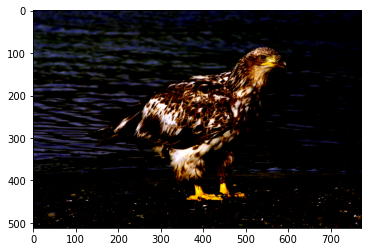

In [ ]:
from PIL import Image

 

# Method to process the red band of the image

def normalizeRed(intensity):

    iI      = intensity

   

    minI    = 86

    maxI    = 230

 

    minO    = 0

    maxO    = 255

 

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO

 

# Method to process the green band of the image

def normalizeGreen(intensity):

    iI      = intensity

   

    minI    = 90

    maxI    = 225

 

    minO    = 0

    maxO    = 255

 

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO

 

# Method to process the blue band of the image

def normalizeBlue(intensity):

    iI      = intensity

   

    minI    = 100

    maxI    = 210

 

    minO    = 0

    maxO    = 255

 

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO

 

 

# Create an image object

imageObject     = Image.open("/content/yolov3/data/eagle.jpg")

 

# Split the red, green and blue bands from the Image

multiBands      = imageObject.split()

 

# Apply point operations that does contrast stretching on each color band

normalizedRedBand      = multiBands[0].point(normalizeRed)

normalizedGreenBand    = multiBands[1].point(normalizeGreen)

normalizedBlueBand     = multiBands[2].point(normalizeBlue)

 

# Create a new image from the contrast stretched red, green and blue brands

normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

 

# image after applying contrast stretching

plt.imshow(normalizedImage)
 




In [ ]:
c = rgb2gray(image3)
d = rgb2gray(ct)
psnr = peak_signal_noise_ratio(c, d)
print(psnr)
a =np.squeeze(np.asarray(image1))
ab = rgb2gray(a)
b = np.squeeze(np.asarray(ct))
abc = rgb2gray(b)
Y_true =  ab # Y_true = Y (original values) 
  
# Calculated values 
Y_pred = abc # Y_pred = Y' 
  
# Mean Squared Error 
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
print (MSE)
imgx=rgb2gray(image1)
imgy2=rgb2gray(ct)
entr_img = entropy(imgy2, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy2, data_range=imgy2.max() - imgy2.min())
print(ssim_none) 

In [ ]:
from skimage.color import gray2rgb

In [ ]:
img = image3
#print(img)
H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
eq_V = cv2.equalizeHist(V)
eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2RGB)



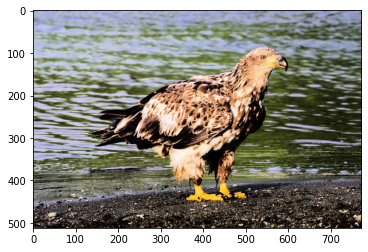

In [ ]:
plt.imshow(eq_image)

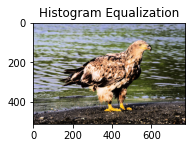

In [ ]:
plt.subplot(1, 2, 2), plt.imshow(eq_image)
plt.title("Histogram Equalization")
plt.show()



In [ ]:
from skimage.color import rgb2gray
psnr = peak_signal_noise_ratio(img, eq_image)
print(psnr)
#mse=mse(img , eq_image)
#print (mse)
imgx=rgb2gray(img)
imgy1=rgb2gray(eq_image)
entr_img = entropy(imgy1, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy1, data_range=imgy1.max() - imgy1.min())
print(ssim_none)


In [ ]:
img3 = cv2.imread('/content/yolov3/data/eagle.jpg')
cla = cv2.createCLAHE(4.0)
H, S, V = cv2.split(cv2.cvtColor(img3, cv2.COLOR_BGR2HSV))
eq_V = cla.apply(V)
img_adapteq = exposure.equalize_adapthist(img3)

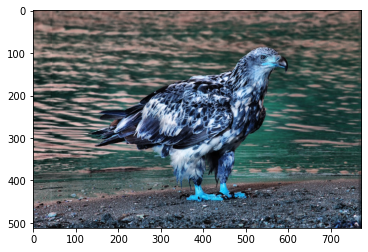

In [ ]:
plt.imshow(img_adapteq)


In [ ]:
from skimage.color import rgb2gray
psnr = peak_signal_noise_ratio(image3, eq_image2)
print(psnr)
#mse=mse(img , eq_image)
#print (mse)
imgx=rgb2gray(image3)
imgy1=rgb2gray(eq_image2)
entr_img = entropy(imgy1, disk(10))
entr=np.mean(entr_img)
entrop=np.mean(entr)
print(entrop)
ssim_none = ssim(imgx, imgy1, data_range=imgy1.max() - imgy1.min())
print(ssim_none)
